### Word Embeddings
Assignment of words to numbers 

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [2]:
# simplified 2D examples

word_embeddings = {
    "cat"    : [0.8,0.6],
    "kitten" : [0.75,0.65],
    "dog"    : [0.7,0.3],
    "puppy"  : [0.65,0.35],
    "car"    : [-0.5,0.2],
    "truck"  : [-0.45,0.15],
}



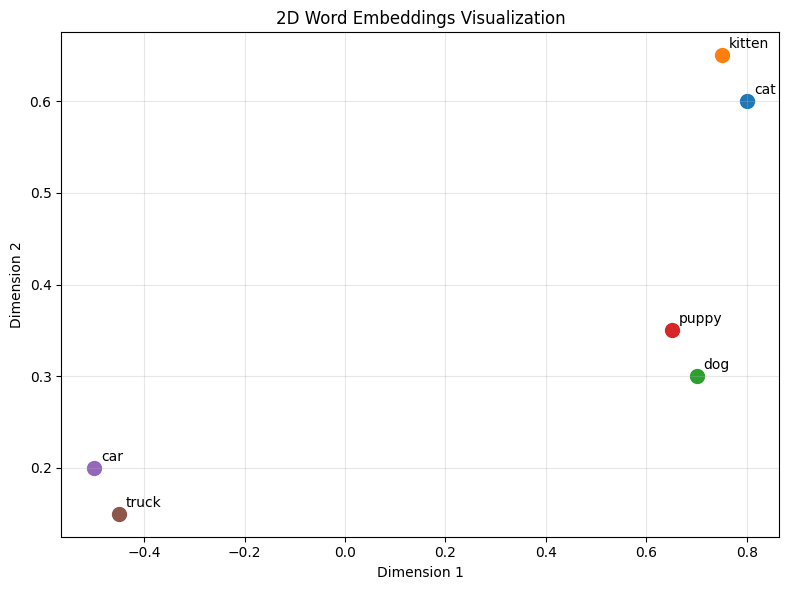

In [3]:
fig, ax = plt.subplots(figsize=(8,6))

for word, coord in word_embeddings.items():
    ax.scatter(coord[0], coord[1], s=100)
    ax.annotate(word, (coord[0], coord[1]), xytext=(5,5), textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('2D Word Embeddings Visualization')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [4]:
### Measuring Similarity

def cosine_similarity(vec1, vec2):
    
    """
    cosine similirarity measures the angle between two vectors
    -  -1 means exactly opposite
    -   0 means orthogonal (uncorrelated)
    -   1 means exactly the same
    """

    dot_product = np.dot(vec1, vec2)
    norm_a = np.linalg.norm(vec1)
    norm_b = np.linalg.norm(vec2)
    return dot_product / (norm_a * norm_b)


In [ ]:
cat_vec    = [0.8,0.6,0.3]
kitten_vec = [0.75,0.65,0.35]
car_vec    = [-0.5,0.2,0.1]

cat_kitten_sim = cosine_similarity(cat_vec, kitten_vec)
print(f"Cosine Similarity between 'cat' and 'kitten': {cat_kitten_sim:.4f}")

#the output will be closer to 1, indicating high similarity


Cosine Similarity between 'cat' and 'kitten': 0.9966


In [ ]:
cat_kitten_sim = cosine_similarity(cat_vec, car_vec)
print(f"Cosine Similarity between 'cat' and 'car': {cat_kitten_sim:.4f}")

#the output will be closer to 0 or negative, indicating low similarity

Cosine Similarity between 'cat' and 'car': -0.4372


### Creating Embeddings


In [7]:
## HuggingFace and OpenAI models

from langchain_huggingface import HuggingFaceEmbeddings

# initialize a simpe embedding model(no API key required)
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

embeddings


/Users/kaushik003/Documents/projects/RAG/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [8]:
# Creating our first embeddings

text = " Hello Iam learining about embeddings! "

embedding = embeddings.embed_query(text)
print(f"text: {text}")
print(f"Embedding_length: {len(embedding)}")
print(embedding)

text:  Hello Iam learining about embeddings! 
Embedding_length: 384
[0.02202621102333069, -0.08987541496753693, 0.01112657692283392, -0.02709135040640831, -0.01704585552215576, 0.07347647845745087, 0.010472655296325684, 0.012212101370096207, 0.05321371927857399, -0.005973906256258488, -0.002149199601262808, 0.04312925413250923, 0.07176033407449722, 0.0055382284335792065, -0.0378291942179203, 0.009324204176664352, 0.034915436059236526, 0.10094568133354187, -0.06553561240434647, 0.016186220571398735, -0.015541467815637589, -0.05457724258303642, -0.022211892530322075, -0.09070529788732529, -0.013773401267826557, -0.016126723960042, -0.043636731803417206, 0.030524397268891335, 0.1193467453122139, -0.07669275999069214, 0.04709244519472122, -0.024782635271549225, 0.0014902838738635182, 0.06369855254888535, -0.046147968620061874, 0.11178960651159286, 0.016708992421627045, -0.025206943973898888, -0.06904716789722443, -0.004434055648744106, -0.018416812643408775, 0.02962101623415947, -0.0569358

In [10]:
sentences = [
    "I love machine learning.",
    "Embeddings are fun to work with.",
    "The sky is blue today.",
    "I enjoy hiking in the mountains."
    "I love traveling to new places."
    "I have a dog named Dhada"
    "Lewis Hamilton is a great F1 driver."

]


embedding_sentence = embeddings.embed_documents(sentences)

print(embedding_sentence[0])
print(embedding_sentence[1])

[-0.016851071268320084, -0.07072188705205917, 0.08554095774888992, -0.001766098546795547, 0.045208774507045746, -0.05311216041445732, -0.04855525866150856, -0.03103909268975258, 0.019992081448435783, 0.0013779278378933668, -0.056426454335451126, 0.08474864065647125, 0.031358782202005386, -0.009936286136507988, -0.0251618605107069, 0.015645645558834076, -0.05058753490447998, 0.010036655701696873, -0.09949711710214615, -0.11036428809165955, -0.05488487705588341, 0.013054857030510902, 0.0016937075415626168, 0.0010150622110813856, 0.02859618328511715, 0.014572405256330967, 0.020524384453892708, -0.008306276984512806, -0.014727791771292686, -0.05601472407579422, -0.012392685748636723, 0.050114553421735764, 0.0008125366875901818, 0.03934527561068535, -0.08508963882923126, 0.021291332319378853, 0.01746697537600994, 0.032956916838884354, 0.017330173403024673, 0.0356920063495636, -0.026970786973834038, -0.0004575072671286762, 0.020498383790254593, 0.012121153064072132, 0.06234348565340042, 0.07

### popular opensource embedding models

#### Model : "sentence-transformers/all-MiniLM-L6-v2"
Dimension: 384  
Description: A small, efficient model suitable for a wide range of tasks.  
use cases: general-purpose embeddings, real-time applications.  

#### Model : "sentence-transformers/paraphrase-MiniLM-L12-v2"
Dimension: 384  
Description: sligtly better performance than all-MiniLM-L6-v2, but a bit slower.  
use case : good balance between performance and speed.  

#### Model : "sentence-transformers/all-mpnet-base-v2"
Dimension: 768  
Description: Best quality , slower than MiniLM models.  
use case: when quality is more important than speed.  

#### Model : "sentence-transformers/multi-qa-MiniLM-L6-cos-v1"
Dimension: 384  
Description: optimized for question-answering tasks.  
use case: FAQ retrieval, QA systems.  

#### Model : "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
Dimension: 384  
Description: supports multiple languages.  
use case: multilingual applications.  
